In [2]:
pip install sklearn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import pandas as pd
import sklearn.feature_extraction.text
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
test = pd.read_csv('Source/test.txt', delimiter='\t')
test = test.fillna('')
test['RETRO_DT_Т'] = pd.to_datetime(test['RETRO_DT'], format = '%Y%m%d')
test['year'] = test['RETRO_DT_Т'] .dt.year
test['month'] = test['RETRO_DT_Т'] .dt.month
test['week']= test['RETRO_DT_Т'].dt.week
test['day'] = test['RETRO_DT_Т'].dt.day
test['dayofweek'] = test['RETRO_DT_Т'].dt.dayofweek

/tmp/ipykernel_15208/3541433072.py:6: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  test['week']= test['RETRO_DT_Т'].dt.week


In [4]:
train5k = pd.read_csv('train5k.csv')
train5k = train5k.fillna('')
train5k['RETRO_DT_Т'] = pd.to_datetime(train5k['RETRO_DT'], format = '%Y%m%d')
train5k['year'] = train5k['RETRO_DT_Т'] .dt.year
train5k['month'] = train5k['RETRO_DT_Т'] .dt.month
train5k['week']= train5k['RETRO_DT_Т'].dt.week
train5k['day'] = train5k['RETRO_DT_Т'].dt.day
train5k['dayofweek'] = train5k['RETRO_DT_Т'].dt.dayofweek

from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(min_df = 1000, token_pattern= r'\D{3,}')
# corpus = ['This is the first document.','This is the second second document.','And the third one.','Is this the first document?',]
anst = pd.DataFrame(vectorizer.fit_transform(np.array(train5k.tokens)).toarray(), columns=vectorizer.get_feature_names_out())

/tmp/ipykernel_15208/609896240.py:6: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  train5k['week']= train5k['RETRO_DT_Т'].dt.week


In [5]:
anst

,amp,anketa,app,application,area,auto,bank,cabinet,card,cards,...,хорошем,цена,ценам,цене,центр,цены,черный,шаг,экспресс,электроники
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,1,1,1,1,1,1,1,1,1,1,...,1,1,0,1,1,1,1,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,1,0,0,0,0
3,0,0,1,1,1,0,0,1,0,0,...,1,0,1,1,0,1,0,1,1,0
4,0,0,1,1,1,0,1,1,1,1,...,1,1,1,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0,1,1,1,0,0,0,1,1,1,...,1,0,1,0,0,0,0,0,0,1
4996,0,0,1,0,0,1,1,0,0,0,...,1,1,1,1,1,1,1,0,0,1
4997,0,0,1,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4998,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,0,0,0,0


In [94]:
test.head()

,CLIENT_ID,RETRO_DT,tokens,urls_hashed,RETRO_DT_Т,year,month,week,day,dayofweek,...,cash,tinkoff,москва,недорого,сезон,работа,телефон,описание,работы,проверка
0,5467000,20200419,vezet 1 hats 2 сухого 1 деньги 1 режим 4 недел...,4104c0437f707b9f443bf845d92d3633 1 83e85bee0d8...,2020-04-19,2020,4,16,19,6,...,0,0,1,1,1,0,1,1,1,0
1,6093848,20201107,статью 1 month 4 udobreniya 1 podkormka 1 акту...,db0853001fff2bbe88cb5fa709d8077e 1 6e617b4bfdb...,2020-11-07,2020,11,45,7,5,...,0,0,1,0,0,0,0,0,0,0
2,5269916,20200305,zdorovye 2 мобильные 1 снять 2 tovara 1 платье...,1889e0cbd3e343e9521a07aa312257ac 2 aee71c8d18d...,2020-03-05,2020,3,10,5,3,...,0,0,1,1,1,1,0,1,1,0
3,816015821,20220115,шины 1 воздушный 1 вкусных 1 эскудо 1 сухого 1...,aee71c8d18d6b91b36bf599208a91777 7 6754d470b22...,2022-01-15,2022,1,2,15,5,...,0,0,0,0,0,0,1,0,1,1
4,223498561,20211204,купить 2 blyudo 2 юрист 2 sekretnye 2 funktsii...,1246f8d1136a114c448c1b2565e16698 2 0f7f6a4507e...,2021-12-04,2021,12,48,4,5,...,1,1,0,0,0,0,0,0,0,0


In [6]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(min_df = 10000, token_pattern= r'\D{3,}')
# corpus = ['This is the first document.','This is the second second document.','And the third one.','Is this the first document?',]
ans = pd.DataFrame(vectorizer.fit_transform(np.array(test.tokens)).toarray(), columns=vectorizer.get_feature_names_out())

236

In [7]:
common_features=list(set(anst.columns).intersection(set(ans.columns)))
print(f'n common features: {len(common_features)}']
train5k = pd.concat([train5k, anst[common_features]], axis=1)
test = pd.concat([test, ans[common_features]], axis=1)
len(train5k.columns)

SyntaxError: closing parenthesis ']' does not match opening parenthesis '(' (1190955656.py, line 2)

In [ ]:
test = pd.concat([test, ans[common_features]], axis=1)

In [ ]:
X_train = train5k.drop(['DEF','tokens','urls_hashed'], axis = 1)
Y_train = pd.DataFrame(train5k['DEF'])
from sklearn.model_selection import train_test_split 
x_train, x_validation, y_train, y_validation = train_test_split(X_train, Y_train, test_size=0.2, random_state=1337)
x, x_v, y, y_v = train_test_split(x_train, y_train, test_size=0.1, random_state=1337)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

model = CatBoostClassifier(n_estimators = 800, learning_rate = 0.02, depth = 4,loss_function='MultiClass', eval_metric='AUC', random_seed = 1337)
model.fit(x.values,y.values,eval_set=(x_v.values,y_v.values))

In [ ]:
#Сделаем предсказание
pred = model.predict_proba(x_validation.values)
from sklearn.metrics import roc_auc_score

print(f'valid: {roc_auc_score(y_validation, pred[:, 1])}')

X_test =  test.drop(['tokens','urls_hashed', 'RETRO_DT_Т' ], axis = 1)
pred = model.predict_proba(X_test.values)

col = test[['CLIENT_ID', 'RETRO_DT']]
df = pd.DataFrame(pred[:, 1], columns=['DEF'])
df = pd.concat([col, df], axis=1)
df.to_csv('sasha1/pred5k.csv', index = False)
df.head()

,importance
feature,
CLIENT_ID,5.999881
day,4.018208
anketa,2.445530
week,2.428129
магазин,2.305094
...,...
займер,0.030103
займ,0.029537
заявка,0.019630


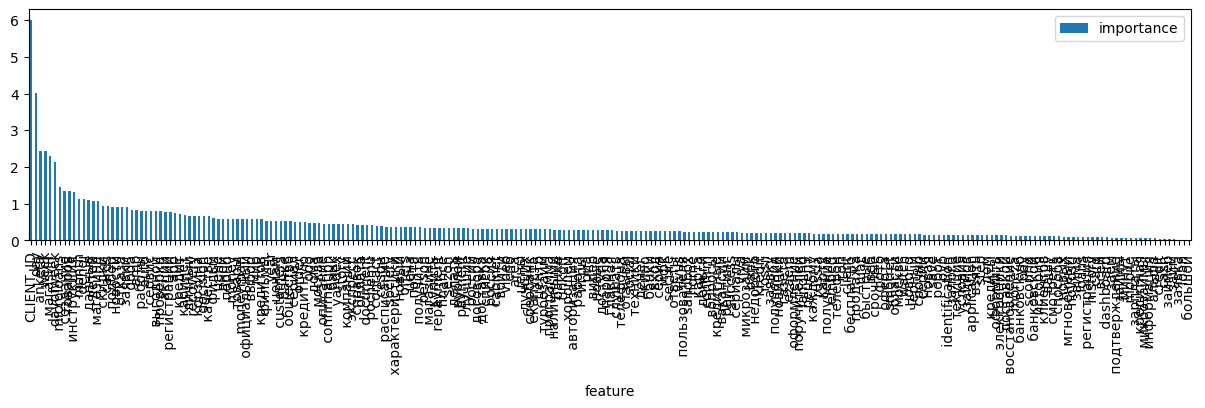

In [58]:
if hasattr(model, 'coef_'): 
    df_importances = sorted(zip(x.columns, model.coef_.ravel()), key=lambda tpl: tpl[1], reverse=True) 
else: 
    df_importances= sorted(zip(x.columns, model.feature_importances_), key=lambda tpl: tpl[1], reverse=True) 
df_importances = pd.DataFrame(df_importances, columns=['feature', 'importance']) 
df_importances = df_importances.set_index('feature') 
df_importances.plot(kind='bar', figsize=(15, 3)) 
df_importances

In [59]:
X_train = train5k.drop(['DEF','tokens','urls_hashed', 'RETRO_DT', 'CLIENT_ID' ], axis = 1)
Y_train = pd.DataFrame(train5k['DEF'])
from sklearn.model_selection import train_test_split 
x_train, x_validation, y_train, y_validation = train_test_split(X_train, Y_train, test_size=0.2, random_state=1337)
x, x_v, y, y_v = train_test_split(x_train, y_train, test_size=0.1, random_state=1337)

In [60]:
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

model = CatBoostClassifier(n_estimators = 800, learning_rate = 0.02, depth = 4,loss_function='MultiClass', eval_metric='AUC', random_seed = 1337)
model.fit(x.values,y.values,eval_set=(x_v.values,y_v.values))

0:	test: 0.5387787	best: 0.5387787 (0)	total: 7.03ms	remaining: 5.62s
1:	test: 0.5323290	best: 0.5387787 (0)	total: 13.4ms	remaining: 5.35s
2:	test: 0.5222212	best: 0.5387787 (0)	total: 18.8ms	remaining: 5s
3:	test: 0.5159639	best: 0.5387787 (0)	total: 25ms	remaining: 4.97s
4:	test: 0.5106212	best: 0.5387787 (0)	total: 30.7ms	remaining: 4.89s
5:	test: 0.5212906	best: 0.5387787 (0)	total: 36ms	remaining: 4.76s
6:	test: 0.5291683	best: 0.5387787 (0)	total: 41ms	remaining: 4.65s
7:	test: 0.5258150	best: 0.5387787 (0)	total: 46.1ms	remaining: 4.57s
8:	test: 0.5234084	best: 0.5387787 (0)	total: 51.7ms	remaining: 4.54s
9:	test: 0.5141670	best: 0.5387787 (0)	total: 57ms	remaining: 4.5s
10:	test: 0.5209858	best: 0.5387787 (0)	total: 62.7ms	remaining: 4.5s
11:	test: 0.5372224	best: 0.5387787 (0)	total: 68ms	remaining: 4.47s
12:	test: 0.5314305	best: 0.5387787 (0)	total: 74ms	remaining: 4.48s
13:	test: 0.5429342	best: 0.5429342 (13)	total: 79.8ms	remaining: 4.48s
14:	test: 0.5460307	best: 0.5460

,importance
feature,
week,3.896424
day,3.744439
anketa,2.508827
магазин,2.366049
инструкция,1.885780
...,...
займер,0.039071
заявка,0.038018
срочно,0.020676


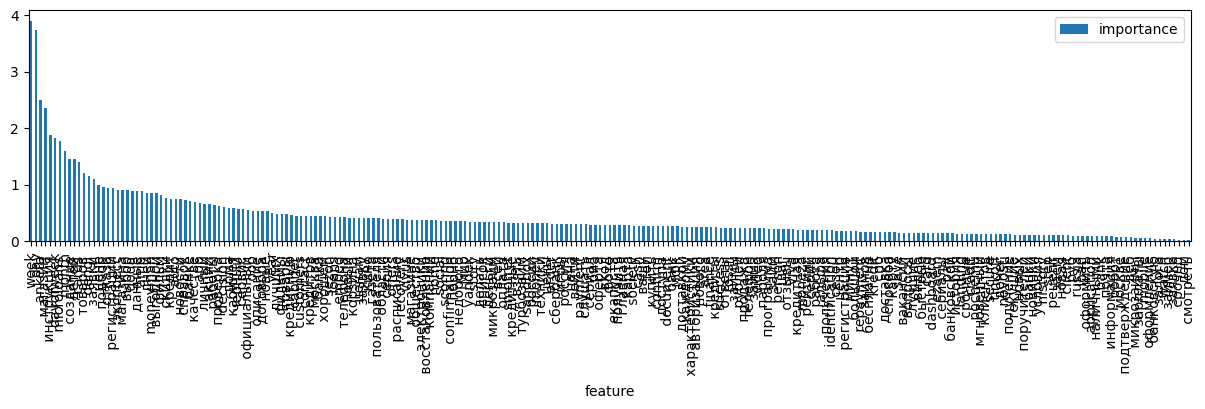

In [61]:
if hasattr(model, 'coef_'): 
    df_importances = sorted(zip(x.columns, model.coef_.ravel()), key=lambda tpl: tpl[1], reverse=True) 
else: 
    df_importances= sorted(zip(x.columns, model.feature_importances_), key=lambda tpl: tpl[1], reverse=True) 
df_importances = pd.DataFrame(df_importances, columns=['feature', 'importance']) 
df_importances = df_importances.set_index('feature') 
df_importances.plot(kind='bar', figsize=(15, 3)) 
df_importances

In [ ]:
проверим на других размерах данных

In [8]:
train300k = pd.read_csv('Source/test.txt', delimiter='\t')
train300k = train300k.fillna('')

In [9]:
train300k.head()

,CLIENT_ID,RETRO_DT,tokens,urls_hashed
0,5467000,20200419,vezet 1 hats 2 сухого 1 деньги 1 режим 4 недел...,4104c0437f707b9f443bf845d92d3633 1 83e85bee0d8...
1,6093848,20201107,статью 1 month 4 udobreniya 1 podkormka 1 акту...,db0853001fff2bbe88cb5fa709d8077e 1 6e617b4bfdb...
2,5269916,20200305,zdorovye 2 мобильные 1 снять 2 tovara 1 платье...,1889e0cbd3e343e9521a07aa312257ac 2 aee71c8d18d...
3,816015821,20220115,шины 1 воздушный 1 вкусных 1 эскудо 1 сухого 1...,aee71c8d18d6b91b36bf599208a91777 7 6754d470b22...
4,223498561,20211204,купить 2 blyudo 2 юрист 2 sekretnye 2 funktsii...,1246f8d1136a114c448c1b2565e16698 2 0f7f6a4507e...


In [10]:
train300k['RETRO_DT_T'] = pd.to_datetime(train300k['RETRO_DT'], format = '%Y%m%d')
train300k['year'] = train300k['RETRO_DT_T'] .dt.year
train300k['month'] = train300k['RETRO_DT_T'] .dt.month
train300k['week']= train300k['RETRO_DT_T'].dt.week
train300k['day'] = train300k['RETRO_DT_T'].dt.day
train300k['dayofweek'] = train300k['RETRO_DT_T'].dt.dayofweek

/tmp/ipykernel_15208/1144485242.py:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  train300k['week']= train300k['RETRO_DT_T'].dt.week


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(min_df = 10000, token_pattern= r'\D{3,}')
# corpus = ['This is the first document.','This is the second second document.','And the third one.','Is this the first document?',]
anst = pd.DataFrame(vectorizer.fit_transform(np.array(train300k.tokens)).toarray(), columns=vectorizer.get_feature_names_out())

In [31]:
common_features=list(set(anst.columns).intersection(set(ans.columns)))
print(f'n common features: {len(common_features)}')


n common features: 1525


In [ ]:
train300k = pd.concat([train300k, anst[common_features]], axis=1)
len(train300k.columns)

In [30]:
test = pd.concat([test, ans[common_features]], axis=1)
len(test.columns)

3060

In [29]:
train300k

,CLIENT_ID,RETRO_DT,tokens,urls_hashed,RETRO_DT_T,year,month,week,day,dayofweek,...,расчет,счет,меню,вести,новинки,мобильных,кинотеатр,сезона,rules,novinki
0,5467000,20200419,vezet 1 hats 2 сухого 1 деньги 1 режим 4 недел...,4104c0437f707b9f443bf845d92d3633 1 83e85bee0d8...,2020-04-19,2020,4,16,19,6,...,1,0,1,1,0,0,0,0,0,0
1,6093848,20201107,статью 1 month 4 udobreniya 1 podkormka 1 акту...,db0853001fff2bbe88cb5fa709d8077e 1 6e617b4bfdb...,2020-11-07,2020,11,45,7,5,...,0,0,0,0,0,0,0,0,0,0
2,5269916,20200305,zdorovye 2 мобильные 1 снять 2 tovara 1 платье...,1889e0cbd3e343e9521a07aa312257ac 2 aee71c8d18d...,2020-03-05,2020,3,10,5,3,...,0,0,1,0,0,1,0,0,0,0
3,816015821,20220115,шины 1 воздушный 1 вкусных 1 эскудо 1 сухого 1...,aee71c8d18d6b91b36bf599208a91777 7 6754d470b22...,2022-01-15,2022,1,2,15,5,...,0,0,0,0,0,0,0,0,0,0
4,223498561,20211204,купить 2 blyudo 2 юрист 2 sekretnye 2 funktsii...,1246f8d1136a114c448c1b2565e16698 2 0f7f6a4507e...,2021-12-04,2021,12,48,4,5,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154799,820037931,20220408,материнские 1 hats 1 чёрный 1 деньги 14 бытово...,1889e0cbd3e343e9521a07aa312257ac 1 aee71c8d18d...,2022-04-08,2022,4,14,8,4,...,1,1,1,0,1,0,1,1,0,0
154800,820043321,20220408,кредит 8 служба 2 шаг 2 наличными 10 зубастики...,68d22a2c8d2fa49d80bbfe9edd8845f0 2 69adb4ce9c4...,2022-04-08,2022,4,14,8,4,...,0,0,0,0,0,0,0,0,0,0
154801,820058971,20220409,циан 1 novogodnie 2 результат 1 центр 1 платье...,a51fa12f9f44dde93d7e36e4ae1c4a0f 1 a18bcf54adc...,2022-04-09,2022,4,14,9,5,...,0,0,0,0,0,0,0,0,0,0
154802,820062491,20220409,макаронных 1 mny 1 снять 1 svete 1 платье 1 mn...,aee71c8d18d6b91b36bf599208a91777 122 d3862674d...,2022-04-09,2022,4,14,9,5,...,0,1,0,0,0,0,0,0,0,0


In [28]:
X_train = train300k.drop(['DEF','tokens','urls_hashed', 'RETRO_DT', 'CLIENT_ID' ], axis = 1)
Y_train = pd.DataFrame(train300k['DEF'])
from sklearn.model_selection import train_test_split 
x, x_v, y, y_v = train_test_split(X_train, Y_train, test_size=0.1, random_state=1337)

KeyError: "['DEF' 'tokens' 'urls_hashed' 'RETRO_DT' 'CLIENT_ID'] not found in axis"

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

model = CatBoostClassifier(n_estimators = 800, learning_rate = 0.02, depth = 5,loss_function='MultiClass', eval_metric='AUC', random_seed = 1337)
model.fit(x.values,y.values,eval_set=(x_v.values,y_v.values))